<!-- Board 1: 4.1 & 4.2
Board 2: 4.3
Board 3: 4.4.1
Board 4: 4.4.2
Board 5: 4.4.2.1
Board 6: 4.4.2.2 -->

# Real Gases

## Overview

Under high pressures, high densities, or low temperatures, we cannot treat gases as sets of non-interacting point particles. Higher pressures imply more frequent collisions and higher densities, higher densities are associated with closer molecules that can more strongly interact and experience each other's finite size, and lower temperatures indicate that molecules have lower kinetic energy and are more disposed to be affected by these interactions. This section presents approaches for quantifying deviations from ideal behavior and the van der Waals equation of state, which is one of the simplest models for real gases and the subject of the [Nobel Prize in Physics 1910](https://www.nobelprize.org/prizes/physics/1910/summary/).

## Deviations from Ideal Behavior

### Compressibility Factor

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.constants import R
from labellines import labelLines
from myst_nb import glue
from scipy.interpolate import interp1d

# Experimental data for H2O at 300 K
df = pd.read_csv("_static/section-04/water_compressibility.csv")

fig, ax = plt.subplots(figsize=(4, 4))
line1 = ax.plot(df["Pressure (bar)"], df["Z"], "b-", label="$Z_\\text{water}$")
labelLines(line1, zorder=2.5)

xlim = ax.get_xlim()
ylim = ax.get_ylim()

x = np.linspace(xlim[0], xlim[1], 100)
y = np.ones_like(x)
line2 = ax.plot(x, y, "r--", label="$Z_\\text{ideal}$")
labelLines(line2, zorder=2.5)

# Interpolating to find the intersection more accurately
interp_Z = interp1d(df["Pressure (bar)"], df["Z"], kind='linear', fill_value="extrapolate")
intersection_pressure = interp1d(df["Z"] - 1, df["Pressure (bar)"], kind='linear')(0)
intersection_Z = interp_Z(intersection_pressure)

# Find the pressure and Z value at which Z is minimized for the real gas
min_Z_index = df["Z"].idxmin()  # Index of the minimum Z value
min_pressure = df.loc[min_Z_index, "Pressure (bar)"]  # Pressure corresponding to the minimum Z
min_Z = df.loc[min_Z_index, "Z"]  # Minimum Z value

x_ideal = np.mean([xlim[0], min_pressure])
ax.annotate("Ideal",
            xy=(0, 1),
            xytext=(x_ideal, 1.1),
            arrowprops=dict(arrowstyle="->"),
            ha='center', va='bottom',
            zorder=4)

x_coincidentally_ideal = np.mean([intersection_pressure, xlim[1]])
ax.annotate("Coincidentally\nideal",
            xy=(intersection_pressure, 1),
            xytext=(x_coincidentally_ideal, 0.9),
            arrowprops=dict(arrowstyle="->"),
            ha='center', va='top',
            zorder=4)

ax.axvline(x=min_pressure, color="black", linestyle=":")
ax.axvline(x=intersection_pressure, color="black", linestyle=":")
x_attractive = np.mean([min_pressure, intersection_pressure])
ax.text(x_attractive, min_Z, "Attractive", ha='center', va='center', color="black")
ax.text(x_coincidentally_ideal, min_Z, "Repulsive", ha='center', va='center', color="black")

# Adjust limits and labels
ax.set_xlim(xlim[0], xlim[1])
ax.set_ylim(ylim[0], ylim[1])

ax.set_xlabel(r"Pressure (bar)")
ax.set_ylabel(r"$Z$")

plt.tight_layout()
glue('compressibility-factor', fig, display=False)
plt.close(fig)

```{glue:figure} compressibility-factor
:name: compressibility-factor
:figwidth: 100%
:align: center

Hello, world!
```

One of the ways to quantify deviations from ideal behavior is by way of the compressibility factor $Z$:

```{math}
:label: compressibility-factor
Z = \frac{P V}{N k_\text{B} T} = \frac{P V}{n R T}.
```

Imagine that you are measuring the volume of a gas at a sequence of pressures and constant temperature. If the gas behaves ideally, $V = N k_\text{B} T / P$, and so $Z = 1$. If the gas deviates from ideal behavior, $Z$ will differ from 1.

## Van der Waals Fluid

### Van der Waals Equation of State

Hello, world!

### Van der Waals Isotherm

Hello, world!

#### Critical Point

Hello, world!

#### Corresponding States

Hello, world!

<!-- # Real Gases & Equations of State I -->

## Introduction

In our previous lectures, we considered ideal gases, which assume non-interacting, point-like particles. This approximation works remarkably well at low pressures and high temperatures but fails to describe gases near condensation conditions. Here, we begin our study of **real gases**, which deviate from ideality due to two key effects:

1. Gas particles have finite size.
2. Gas particles interact with each other (attractive and repulsive forces).

We focus on the **van der Waals (vdW) equation of state**, a simple yet instructive model that incorporates these real-gas features. This equation accurately reproduces qualitative aspects such as non-ideal behavior, phase transitions from gas to liquid, and the existence of a critical point.

---

## The van der Waals Equation

### Derivation & Physical Meaning of $a$ and $b$

#### Key Idea

The van der Waals equation modifies the ideal gas law $P V_m = R T$ by correcting for particle size and intermolecular attractions.

- **Finite Particle Size Correction**: The parameter $b$ accounts for the **excluded volume** per mole due to the finite size of molecules. Since real gas particles occupy space, the available volume for molecular motion is less than the total container volume.

- **Intermolecular Attraction Correction**: The parameter $a$ corrects the pressure for the attractive forces between molecules. Attractive interactions effectively reduce the momentum transfer to the walls and hence the measured pressure.

#### Mathematically

$$
\left(P + \frac{a}{V_m^2}\right)(V_m - b) = R T
$$

where $V_m$ is the molar volume.

#### Interpretation

- Increasing $a$: stronger intermolecular attractions.
- Increasing $b$: larger molecular size, reducing the free volume.

### Alternative Form

$$
P = \frac{R T}{V_m - b} - \frac{a}{V_m^2}
$$

This rearrangement shows the balance between a repulsive term $RT/(V_m - b)$ and an attractive term $a/V_m^2$.

---

## Critical Phenomena & the Critical Point

### Key Concept

As temperature and pressure increase, the distinction between liquid and gas phases blurs. At a specific combination of temperature ($T_c$), pressure ($P_c$), and volume ($V_{m,c}$), the system reaches the **critical point**. Beyond the critical point, there is no longer a clear boundary between the liquid and gaseous states—only a supercritical fluid remains.

### Conditions at the Critical Point

From the van der Waals equation, applying conditions for the critical point yields:

$$
V_{m,c} = 3b, \quad P_c = \frac{a}{27 b^2}, \quad T_c = \frac{8a}{27 R b}.
$$

At $(P_c, V_{m,c}, T_c)$, the first and second derivatives of $P$ with respect to $V_m$ vanish. This mathematical condition corresponds to the inflection point on the critical isotherm.

```{admonition} Derivation of Critical Conditions
:class: dropdown

To find the critical point $\left(P_c, V_{m,c}, T_c\right)$ for a van der Waals gas, we use two conditions on the isotherm at $\,T = T_c$:

1. $\left.\left(\frac{\partial P}{\partial V_m}\right)_{T}\right|_{V_{m,c}} = 0$
2. $\left.\left(\frac{\partial^2 P}{\partial V_m^2}\right)_{T}\right|_{V_{m,c}} = 0$

where the pressure $P$ is given by the van der Waals equation:

$$
P = \frac{R T}{\,V_m - b\,} \;-\; \frac{a}{\,V_m^2\,}.
$$

---

**Step 1: First Derivative Condition**

$$
\left.\left(\frac{\partial P}{\partial V_m}\right)_{T}\right|_{V_{m,c}} 
\;=\;
\left.\frac{\partial}{\partial V_m}
\left[\tfrac{R T}{\,V_m - b\,} - \tfrac{a}{\,V_m^2\,}\right]
\right|_{V_{m,c}}
\;=\; 0.
$$

Compute each term’s derivative with respect to $V_m$:

- For $\tfrac{R T}{\,V_m - b\,}$:

  $$
  \frac{\partial}{\partial V_m} \left(\frac{R T}{V_m - b}\right)
  = -\,\frac{R T}{\,(V_m - b)^2\,}.
  $$

- For $\tfrac{a}{\,V_m^2\,}$:

  $$
  \frac{\partial}{\partial V_m} \left(\frac{a}{\,V_m^2}\right)
  = -\,\frac{2\,a}{\,V_m^3\,}.
  $$

So the first derivative is:

$$
\left.\left(\frac{\partial P}{\partial V_m}\right)_{T}\right|_{V_{m,c}}
= -\,\frac{R T_c}{\,(V_{m,c} - b)^2\,} \;+\; \frac{2\,a}{\,V_{m,c}^3\,}
= 0.
$$

Rearranging yields:

$$
\frac{R T_c}{\,(V_{m,c} - b)^2\,}
= \frac{2\,a}{\,V_{m,c}^3\,}.
$$

---

**Step 2: Second Derivative Condition**

$$
\left.\left(\frac{\partial^2 P}{\partial V_m^2}\right)_{T}\right|_{V_{m,c}}
= 0.
$$

Starting again from $P = \tfrac{R T}{\,V_m - b\,} - \tfrac{a}{\,V_m^2\,}$, we take the second derivative:

1. The derivative of $-\,\tfrac{R T}{\,(V_m - b)^2\,}$ with respect to $V_m$:

   $$
   \frac{\partial}{\partial V_m} 
   \left(-\frac{R T}{\,(V_m - b)^2}\right)
   = 2 \,\frac{R T}{\,(V_m - b)^3\,}.
   $$

2. The derivative of $\tfrac{2\,a}{\,V_m^3\,}$ with respect to $V_m$:

   $$
   \frac{\partial}{\partial V_m} \left(\frac{2\,a}{\,V_m^3}\right)
   = -\,\frac{6\,a}{\,V_m^4\,}.
   $$

Hence,

$$
\left.\left(\frac{\partial^2 P}{\partial V_m^2}\right)_{T}\right|_{V_{m,c}}
= 2\,\frac{R T_c}{\,(V_{m,c} - b)^3\,} \;-\; \frac{6\,a}{\,V_{m,c}^4\,}
= 0.
$$

Rearranging gives:

$$
\frac{2\,R T_c}{\,(V_{m,c} - b)^3\,}
= \frac{6\,a}{\,V_{m,c}^4\,}.
$$

---

**Step 3: Solving Simultaneously**

We now have two equations:

$$
\begin{aligned}
\frac{R T_c}{(V_{m,c} - b)^2} &= \frac{2\,a}{V_{m,c}^3}, \\
\frac{2\,R T_c}{(V_{m,c} - b)^3} &= \frac{6\,a}{V_{m,c}^4}.
\end{aligned}
$$

Divide the second equation by the first to eliminate $R T_c$ and $a$. Simplifying yields:

$$
\frac{\left(V_{m,c} - b\right)^2}{\left(V_{m,c} - b\right)^3}
= \frac{2\,V_{m,c}^3}{\,6\,V_{m,c}^4\,} \quad\Longrightarrow\quad
\frac{1}{\,V_{m,c} - b\,}
= \frac{1}{\,3\,V_{m,c}\,}.
$$

Thus $V_{m,c} = 3\,b$. Substituting $V_{m,c} = 3b$ back into the first derivative condition determines $T_c$ and then $P_c$:

$$
T_c = \frac{8\,a}{\,27\,R\,b}, 
\quad
P_c = \frac{a}{\,27\,b^2}.
$$

**Result:**

$$
\boxed{
V_{m,c} \;=\; 3\,b, \quad
T_c \;=\; \frac{8\,a}{27\,R\,b}, \quad
P_c \;=\; \frac{a}{27\,b^2}.
}
$$

These formulas express the van der Waals critical volume, temperature, and pressure in terms of $a$ and $b$.
```

---

FileNotFoundError: [Errno 2] No such file or directory: '_static/lecture-04/He_data.xlsx'

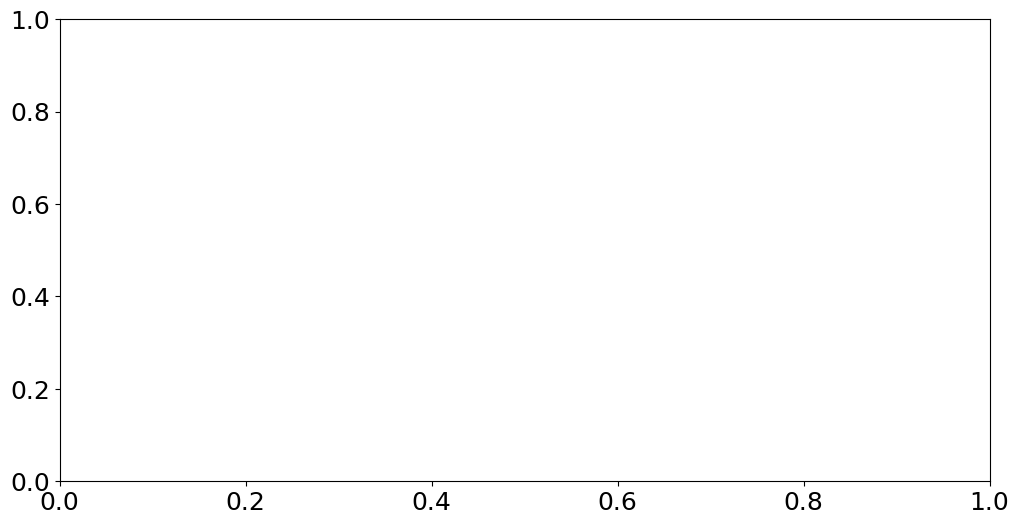

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from myst_nb import glue

# Set plot style
plt.style.use('seaborn-v0_8-colorblind')

# Increase font size for better readability
plt.rcParams.update({'font.size': 18})

# Gas constant in L·bar/(K·mol)
R = 0.08314  

# Van der Waals parameters for Helium
a_He = 0.0346   # L²·bar/mol²
b_He = 0.0238   # L/mol

def van_der_waals_pressure(a, b, T, V):
    """
    Calculate the van der Waals pressure for given parameters.

    Parameters
    ----------
    a : float
        Attraction parameter (L²·bar/mol²).
    b : float
        Excluded volume parameter (L/mol).
    T : float
        Temperature (K).
    V : ndarray
        Molar volume array (L/mol).

    Returns
    -------
    ndarray
        Pressure in bar for each volume.
    """
    return R * T / (V - b) - a / V**2

def plot_vdw_isotherms(ax, a, b, Tc, Pc, Vc):
    """
    Plot van der Waals isotherms for temperatures ranging from 0.8 T_c to 1.2 T_c.

    Parameters
    ----------
    ax : matplotlib.axes.Axes
        The axes on which to plot.
    a, b : float
        van der Waals parameters.
    Tc, Pc, Vc : float
        Critical temperature, pressure, and molar volume.
    """
    # Reduced temperature range
    Tr = np.linspace(0.8, 1.2, 3)
    # Reduced volume range
    Vr = np.linspace(0.4, 8, 1000)

    # Actual T and V arrays
    T_vals = Tc * Tr
    V_vals = Vc * Vr

    # Plot each isotherm
    for i, T_i in enumerate(T_vals):
        P_vals = van_der_waals_pressure(a, b, T_i, V_vals)
        ax.plot(V_vals, P_vals, label=rf"vdW: $T = {Tr[i]:.1f}\,T_c$")

    ax.set_ylim(-0.4 * Pc, 2.6 * Pc)
    ax.set_xlabel(r"$V_m$ (L/mol)")
    ax.set_ylabel(r"$P$ (bar)")
    ax.legend()

# Create a figure
fig, axs = plt.subplot_mosaic([[0]], figsize=(12, 6))

# Load experimental data for Helium
df_He = pd.read_excel("_static/lecture-04/He_data.xlsx")

# Plot experimental data at ~0.8 T_c
axs[0].plot(df_He["Volume (l/mol)"], df_He["Pressure (bar)"], 
            label="Experiment, $T \\approx 0.8\,T_c$", color="black")

# Compute critical constants for Helium
Tc_He = 8 * a_He / (27 * R * b_He)
Pc_He = a_He / (27 * b_He**2)
Vc_He = 3 * b_He

# Plot theoretical van der Waals isotherms
plot_vdw_isotherms(axs[0], a_He, b_He, Tc_He, Pc_He, Vc_He)

# Save figure for later embedding with myst_nb's glue
glue("vdw_isotherms", fig, display=False)

# Close figure to prevent duplicate display
plt.close(fig)

```{glue:figure} vdw_isotherms
:name: vdw-isotherms
:figwidth: 100%
:align: center

Comparison of experimental $P$-$V$ data for Helium near $0.8\,T_c$ (black solid line) and theoretical van der Waals isotherms spanning $0.8\,T_c$ to $1.2\,T_c$. The experimental data aligns reasonably well with the model at lower pressures and highlights deviations at higher pressures.
```

### Physical Insight

At $T < T_c$, isotherms show non-ideal behavior with regions corresponding to phase coexistence (plateaus where liquid and gas are in equilibrium). At $T = T_c$, the isotherm has a point of inflection. For $T > T_c$, there are no phase boundaries.

---

## $P$-$V$ Diagrams: Phases and Phase Transitions

In $P$-$V$ diagrams at constant temperature, the **van der Waals isotherms** can exhibit a non-monotonic region where a naive application would predict negative compressibility. Physical systems avoid this instability by undergoing phase separation into coexisting liquid and gas phases. The equal-area Maxwell construction (discussed in detail in later lectures) addresses this.

Below the critical temperature ($T < T_c$), the isotherm has three segments:

- A low-pressure, large-volume (gas) region.
- A middle, unstable region.
- A high-pressure, small-volume (liquid) region.

At equilibrium, the system is a mixture of liquid and gas with a flat $P$-$V$ tie line. At exactly $T = T_c$, these two distinct phases merge.

---

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Set plot style
plt.style.use('seaborn-v0_8-colorblind')
plt.rcParams.update({'font.size': 18})

# Gas constant in L·bar/(K·mol)
R = 0.08314  

# Van der Waals parameters for Helium
a_He = 0.0346   # L²·bar/mol²
b_He = 0.0238   # L/mol

def van_der_waals_pressure(a, b, T, V):
    """
    Calculate the van der Waals pressure for given parameters.
    """
    return R * T / (V - b) - a / V**2

# Load experimental data for Helium
df_He = pd.read_excel("_static/lecture-04/He_data.xlsx")

# Identify discontinuities to show phase boundaries
dPdV = np.gradient(df_He["Pressure (bar)"], df_He["Volume (l/mol)"])
discontinuities = np.where(np.abs(np.diff(dPdV)) > 0.1)[0]

# Create figure
fig, ax = plt.subplots(figsize=(14, 6))

# Plot the experimental data in black
ax.plot(df_He["Volume (l/mol)"], df_He["Pressure (bar)"], color="black", linestyle="-")

# Add vertical lines at approximate phase boundaries
for idx in [discontinuities[0], discontinuities[1]]:
    ax.axvline(x=df_He["Volume (l/mol)"][idx], color="blue", linestyle="-")

# Apply log scales
ax.set_xscale('log')
ax.set_yscale('log')

# Label axes
ax.set_xlabel(r"$V_m$ (L/mol)")
ax.set_ylabel(r"$P$ (bar)")

# Annotate liquid/gas volumes
V_l = df_He["Volume (l/mol)"][discontinuities[1]]
V_g = df_He["Volume (l/mol)"][discontinuities[0]]
P_text_min = ax.get_ylim()[0] + 0.1
P_text_max = ax.get_ylim()[1] - 0.2

ax.text(V_l, P_text_min, "$\leftarrow$ liquid", ha='right', va='center', color="blue", rotation=90)
ax.text(V_l * 1.1, P_text_max, 
        rf"$V_m = {V_l:.2f}\,\mathrm{{L/mol}} = {V_l / b_He:.2f}\,b$", 
        ha='left', va='top', color="blue")

ax.text(V_g, P_text_min, "$\\rightarrow$ gas", ha='left', va='center', color="blue")
ax.text(V_g * 1.1, P_text_max, 
        rf"$V_g = {V_g:.2f}\,\mathrm{{L/mol}} = {V_g / b_He:.2f}\,b$", 
        ha='left', va='top', color="blue")

mid_label = (V_l + V_g) / 2
ax.text(mid_label, P_text_min, "liquid-gas mixture", ha='center', va='center', color="blue")

# Save figure for later embedding with myst_nb's glue
glue("vdw_phase_diagram", fig, display=False)

# Close figure to prevent duplicate display
plt.close(fig)

```{glue:figure} vdw_phase_diagram
:name: vdw-phase-diagram
:figwidth: 100%
:align: center

Experimental $P$-$V$ data for Helium at $T \approx 0.8\,T_c$ plotted on a log-log scale. Vertical lines mark approximate discontinuities in the derivative $\partial P/\partial V$, illustrating transitions from liquid to gas via a coexistence region. The annotations highlight estimated molar volumes for the liquid-like and gas-like phases.
```

---

## Comparisons – Ideal vs. van der Waals Behavior

### Ideal Gas

$$
P V = R T \quad \Rightarrow \quad P = \frac{R T}{V_m}.
$$

This simple linear relationship in $1/V_m$ ignores both molecular volume and intermolecular forces. As a result, ideal isotherms never show a phase transition. The ideal gas law breaks down near condensation conditions.

### van der Waals Gas

Incorporating $a$ and $b$:

- Predicts non-ideal behavior at high pressures and/or low temperatures.
- Captures the existence of a critical point and the qualitative features of phase transitions.
- Reduces to ideal behavior in the limit $a \to 0$ and $b \to 0$.

---

## The Principle of Corresponding States

### Core Idea

All fluids, when compared at corresponding states (same reduced temperature $T_r = T/T_c$, reduced pressure $P_r = P/P_c$, and reduced volume $V_{m,r} = V_m/V_{m,c}$), exhibit similar behavior. This is known as the **principle of corresponding states**.

### Reduced van der Waals Equation

By dividing $P$, $V_m$, and $T$ by their critical values, we can rewrite the vdW equation in a universal form:

$$
\boxed{\left(P_r + \frac{3}{V_{m,r}^2}\right) (V_{m,r} - \tfrac{1}{3}) = \tfrac{8}{3} T_r.}
$$

### Implication

Once you know the critical constants of one fluid, you can predict the qualitative behavior of all others simply by using the reduced variables. Thus, helium and benzene, despite their vast differences, follow the same pattern when scaled by their critical values.

---

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Set plot style
plt.style.use('seaborn-v0_8-colorblind')
plt.rcParams.update({'font.size': 18})

# Gas constant in L·bar/(K·mol)
R = 0.08314  

# van der Waals parameters for Helium
a_He = 0.0346    # L²·bar/mol²
b_He = 0.0238    # L/mol

# van der Waals parameters for Benzene
a_Benzene = 18.24   # L²·bar/mol²
b_Benzene = 0.1193  # L/mol

def van_der_waals_pressure(a, b, T, V):
    """
    Calculate the van der Waals pressure for given parameters.
    """
    return R * T / (V - b) - a / V**2

def plot_reduced_isotherms(ax, a, b, Tc, Pc, Vc, label, linestyle="-"):
    """
    Plot reduced van der Waals isotherms (Pr vs. Vr) for T = 0.8-1.2 T_c.

    Parameters
    ----------
    ax : matplotlib.axes.Axes
        Axis on which to plot.
    a, b : float
        van der Waals parameters.
    Tc, Pc, Vc : float
        Critical temperature, pressure, and volume.
    label : str
        Label for the substance in the legend.
    linestyle : str, optional
        Line style for the isotherms.
    """
    # Reduced T and V ranges
    Tr = np.linspace(0.8, 1.2, 3)
    Vr = np.linspace(0.4, 8, 1000)

    # Loop over each reduced temperature
    for T_val in Tr:
        # Actual T and V
        T_actual = Tc * T_val
        V_actual = Vc * Vr

        # Calculate van der Waals pressure
        P_vals = van_der_waals_pressure(a, b, T_actual, V_actual)
        P_reduced = P_vals / Pc

        ax.plot(Vr, P_reduced, linestyle=linestyle,
                label=rf"{label}, $T = {T_val:.1f}\,T_c$")

    ax.set_xlabel(r"$V_{m,r}$")
    ax.set_ylabel(r"$P_r$")
    ax.legend()

# Create figure
fig, ax = plt.subplots(figsize=(12, 6))

# Critical constants for Helium
Tc_He = 8 * a_He / (27 * R * b_He)
Pc_He = a_He / (27 * b_He**2)
Vc_He = 3 * b_He

# Critical constants for Benzene
Tc_Benzene = 8 * a_Benzene / (27 * R * b_Benzene)
Pc_Benzene = a_Benzene / (27 * b_Benzene**2)
Vc_Benzene = 3 * b_Benzene

# Plot Helium in reduced coordinates
plot_reduced_isotherms(ax, a_He, b_He, Tc_He, Pc_He, Vc_He, "He")

# Plot Benzene in reduced coordinates
plot_reduced_isotherms(ax, a_Benzene, b_Benzene, Tc_Benzene, Pc_Benzene,
                       Vc_Benzene, "Benzene", linestyle="--")

ax.set_ylim(-0.4, 2.6)

# Save figure for later embedding with myst_nb's glue
glue("vdw_reduced_isotherms", fig, display=False)

# Close figure to prevent duplicate display
plt.close(fig)

```{glue:figure} vdw_reduced_isotherms
:name: vdw-reduced-isotherms
:figwidth: 100%
:align: center

Reduced $P$-$V$ isotherms ($P_r$ vs. $V_{m,r}$) for Helium and Benzene at three temperatures $T = 0.8\,T_c$, $1.0\,T_c$, and $1.2\,T_c$. The data for both substances collapse onto comparable curves in reduced coordinates, illustrating the principle of corresponding states (i.e., fluids exhibit universal behavior when scaled by their respective critical properties).
```

<!-- **Estimating Molecular Sizes**:
From $b$, one can infer a characteristic molecular volume and thus estimate particle diameters. These estimates (e.g., ~3.4 Å for He, ~5.8 Å for benzene) agree reasonably well with typical molecular dimensions. -->

---

## Summary & Key Takeaways

- **van der Waals EoS**: Incorporates finite size (parameter $b$) and intermolecular attractions (parameter $a$).
- **Critical Point**: Marks the end of the liquid-gas coexistence curve. Derived conditions give $V_{m,c}, P_c, T_c$ in terms of $a$ and $b$.
- **Phase Behavior**: vdW isotherms predict liquid-gas phase transitions below $T_c$ and supercritical fluids above $T_c$.
- **Corresponding States**: Rescaling by critical properties yields universal behavior for all substances. This highlights the generality of the van der Waals form and guides the prediction of properties of unknown fluids by analogy.